Fake News Classifier
Dataset: https://www.kaggle.com/c/fake-news/data#

In [12]:
import pandas as pd

In [46]:
df = pd.read_csv('fake-news/train.csv')

In [47]:
df.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [49]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [50]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
df.title[0], df.text[0]

('House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the Hou

In [53]:
df.label.unique()

array([1, 0], dtype=int64)

In [55]:
df[df.label==1]

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
...,...,...,...,...,...
20788,20788,Maine’s Gov. LePage Threatens To ‘Investigate’...,Joe Clark,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [56]:
df.shape

(20800, 5)

In [57]:
df=df.copy()

In [58]:
df=df.dropna()

In [59]:
df.shape

(18285, 5)

In [60]:
df.label

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [61]:
df.reset_index(inplace=True)

In [62]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [64]:
df.title[6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [70]:
import re
from nltk.corpus import stopwords #remove stopwords/common english word that does not add much value
from nltk.stem.porter import PorterStemmer #reduce words to the stem/root word

ps = PorterStemmer()
corpus =[]

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i] )
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [72]:
corpus[0:8]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time']

In [73]:
df.title[0:8]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
5    Jackie Mason: Hollywood Would Love Trump if He...
6    Benoît Hamon Wins French Socialist Party’s Pre...
7    A Back-Channel Plan for Ukraine and Russia, Co...
Name: title, dtype: object

In [74]:
#applying CountVectorizer
#Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [75]:
X.shape

(18285, 5000)

In [80]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [81]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [76]:
y=df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [77]:
#divide data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [82]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [83]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
count_df.shape

(12250, 5000)

In [85]:
import matplotlib.pyplot as plt

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinonialNB Algorithmn

In [87]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [88]:
from sklearn import metrics
import numpy as np
import itertools 

In [89]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [90]:
pred = classifier.predict(X_test)

In [91]:
score = metrics.accuracy_score(y_test, pred)

In [92]:
print("accuracy:  %0.3f" % score)

accuracy:  0.901


In [93]:
cm = metrics.confusion_matrix(y_test,pred)

Confusion matrix, without normalization


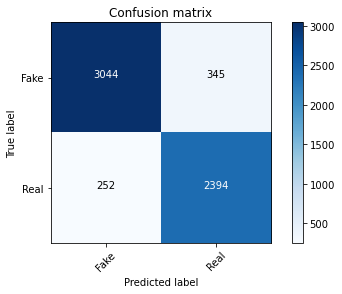

In [94]:
plot_confusion_matrix(cm, classes=["Fake", 'Real'])

In [95]:
## Get Features names
feature_names = cv.get_feature_names()

In [96]:
classifier.coef_[0]

array([ -9.09148927,  -8.62148564,  -9.09148927, ..., -10.70092718,
        -8.90916771,  -9.31463282])

In [97]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.011327909390991, 'trump'),
 (-4.299009981842771, 'hillari'),
 (-4.407507899723476, 'clinton'),
 (-4.910967007672704, 'elect'),
 (-5.187498432404975, 'new'),
 (-5.245606063212255, 'comment'),
 (-5.284826776365537, 'video'),
 (-5.397622270510881, 'war'),
 (-5.407622353845465, 'us'),
 (-5.42281251933944, 'hillari clinton'),
 (-5.42792762000621, 'fbi'),
 (-5.491441025728536, 'vote'),
 (-5.576963199166698, 'email'),
 (-5.5889393902134135, 'world'),
 (-5.644681373221649, 'obama'),
 (-5.745100120968696, 'donald'),
 (-5.773673493412752, 'donald trump'),
 (-5.7956524001315275, 'russia'),
 (-5.856740092111366, 'day'),
 (-5.872613441267656, 'america')]

In [99]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.700927178569957, 'abe'),
 (-10.700927178569957, 'abroad'),
 (-10.700927178569957, 'abus new'),
 (-10.700927178569957, 'abus new york'),
 (-10.700927178569957, 'act new'),
 (-10.700927178569957, 'act new york'),
 (-10.700927178569957, 'advic'),
 (-10.700927178569957, 'advis new'),
 (-10.700927178569957, 'advis new york'),
 (-10.700927178569957, 'afford care'),
 (-10.700927178569957, 'afford care act'),
 (-10.700927178569957, 'age new'),
 (-10.700927178569957, 'age new york'),
 (-10.700927178569957, 'agenda breitbart'),
 (-10.700927178569957, 'ail'),
 (-10.700927178569957, 'airbag'),
 (-10.700927178569957, 'aleppo new'),
 (-10.700927178569957, 'aleppo new york'),
 (-10.700927178569957, 'ali'),
 (-10.700927178569957, 'america breitbart')]